In [107]:
import xspec
import numpy as np
import matplotlib.pyplot as plot
import scipy
from scipy.interpolate import interp1d
from scipy.optimize import minimize

In [7]:
xspec.AllData("spec_grp_1.pi")
xspec.Plot("data")
xspec.Plot.xAxis = "keV"
x_values = xspec.Plot.x()
y_values = xspec.Plot.y()
y_error = np.array(xspec.Plot.yErr())
x_error = np.array(xspec.Plot.xErr())


Spectrum #: 1 replaced 

1 spectrum  in use
 
Spectral Data File: spec_grp_1.pi  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.098e-01 +/- 4.637e-02 (91.2 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-282
  Telescope: eROSITA Instrument: MERGED  Channel Type: PI
  Exposure Time: 209.2 sec
 Using fit statistic: chi
 Using Background File                ./en01_079066_020_BackgrSpec_00008_c010.fits
  Background Exposure Time: 209.2 sec
 Using Response (RMF) File            ./en01_079066_020_RMF_00008_c010.fits for Source 1
 Using Auxiliary Response (ARF) File  ./en01_079066_020_ARF_00008_c010.fits



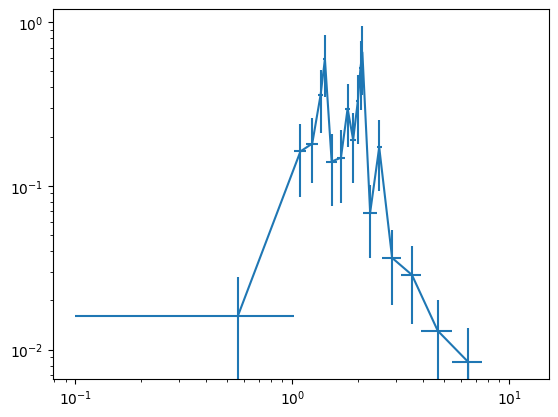

In [67]:
#Plotting
plot.errorbar(x_values,y_values,xerr = x_error, yerr = y_error)
plot.xscale("log")
plot.yscale("log")

In [87]:
#Column Stacking X and Removing negative and zero counts
x = np.log10(x_values)
y = y_values

X1 = np.column_stack((x,y))
X = []
for i in X1:
    if i[-1] != 0 and np.all(i > 0):  
        X.append(i)
        #y_val = np.array(y_val)
X= np.array(X)

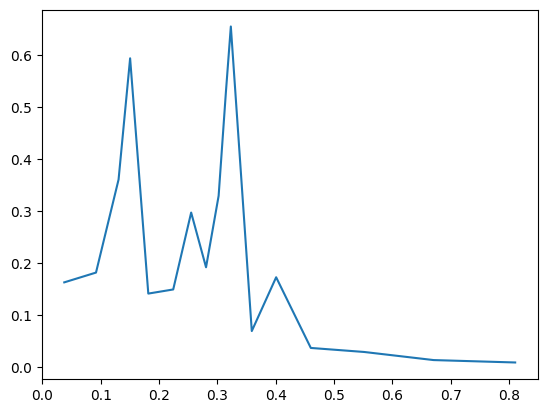

In [102]:
#Plotting the final plot
energy =  X[:,0]
counts = X[:,1]
plot.plot(energy,counts)

In [ ]:
##Doing interpolation to find Ep through minimization 
f = interp1d(energy,counts, kind = "cubic", fill_value="extrapolate")

def f1(x):
    if energy.min() <= x <= energy.max():  
        return -f(x)

max_e = minimize(f1,x0 = 0.3,method = "Nelder-Mead").x[0]
max_count = f(max_e)
max_count

array(0.66535981)